## Portfolio assignment 15
30 min: Train a decision tree to predict the species of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

Optional: Perform the same tasks but try to predict the sex of the pinguin based on the other columns

In [175]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [176]:
penguins = sns.load_dataset("penguins")
penguins.fillna(penguins.mean(), inplace=True)
penguins = penguins[penguins['sex'].notna()]

penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, random_state=42, stratify=penguins['species'])

C:\Users\Jens\AppData\Local\Temp\ipykernel_4304\1888856847.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  penguins.fillna(penguins.mean(), inplace=True)


In [177]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [179]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

# Decision tree based on species

In [180]:
features= ['bill_length_mm']
dt = DecisionTreeClassifier(max_depth = 2) # Increase max_depth to see effect in the plot
dt.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=2)

In [181]:
predictions = dt.predict(penguins_train[features])
predictions

array(['Gentoo', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 

In [182]:
predictions = dt.predict(penguins_test[features])
predictions

array(['Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Chinstrap', 'Chinstrap', 

In [183]:
predictionsOnTrainset = dt.predict(penguins_train[features])
predictionsOnTestset = dt.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.8068669527896996
Accuracy on test set 0.7


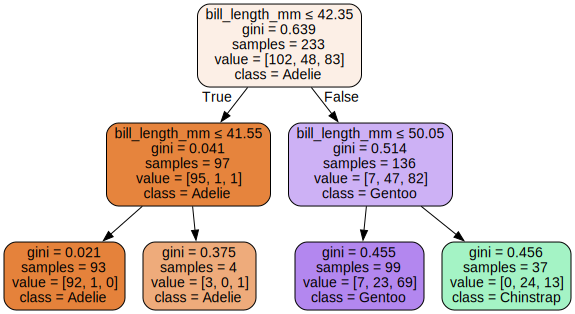

In [184]:
plot_tree_classification(dt, features, np.sort(penguins.species.unique()))

# Decision tree based on sex

In [185]:
features= ['bill_length_mm']
dt = DecisionTreeClassifier(max_depth = 2) # Increase max_depth to see effect in the plot
dt.fit(penguins_train[features], penguins_train['sex'])

DecisionTreeClassifier(max_depth=2)

In [186]:
predictions = dt.predict(penguins_train[features])
predictions

array(['Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 

In [187]:
predictions = dt.predict(penguins_test[features])
predictions

array(['Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Fem

In [188]:
predictionsOnTrainset = dt.predict(penguins_train[features])
predictionsOnTestset = dt.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.sex)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.sex)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.6952789699570815
Accuracy on test set 0.69


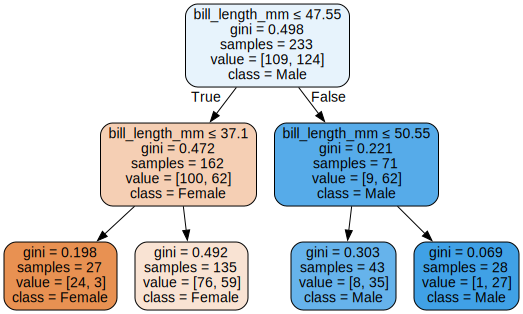

In [189]:
plot_tree_classification(dt, features, np.sort(penguins.sex.unique()))